In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [ ]:
!kaggle datasets download -d gauravduttakiit/resume-dataset

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset
License(s): CC0-1.0
resume-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/resume-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The Dataset is Extracted")

The Dataset is Extracted


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
resume =  pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [ ]:
resume.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
resume.shape

(962, 2)

In [ ]:
resume['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [ ]:
resume['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

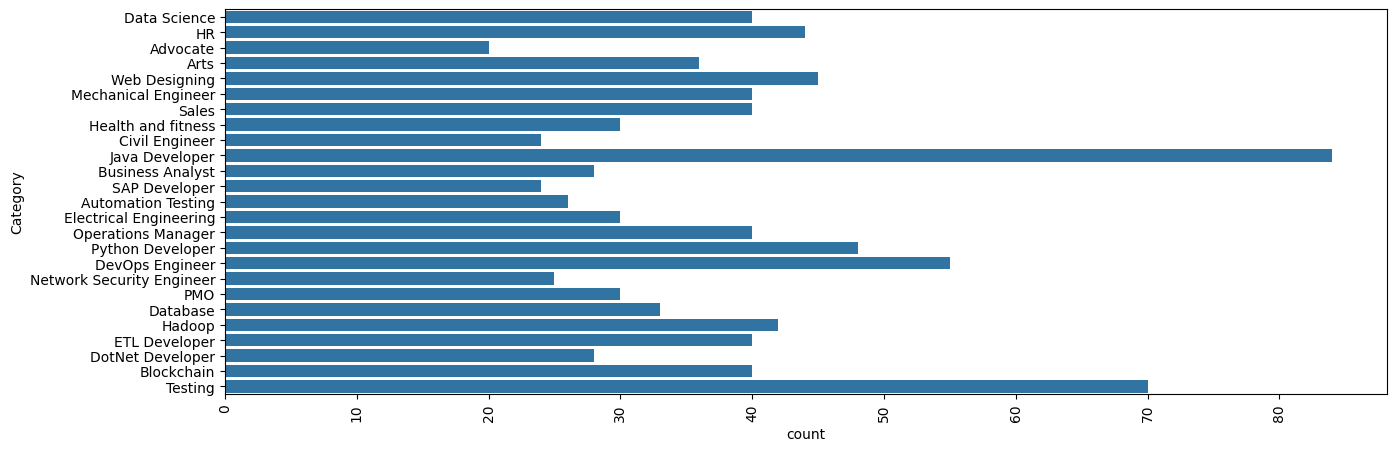

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(resume['Category'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
resume['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

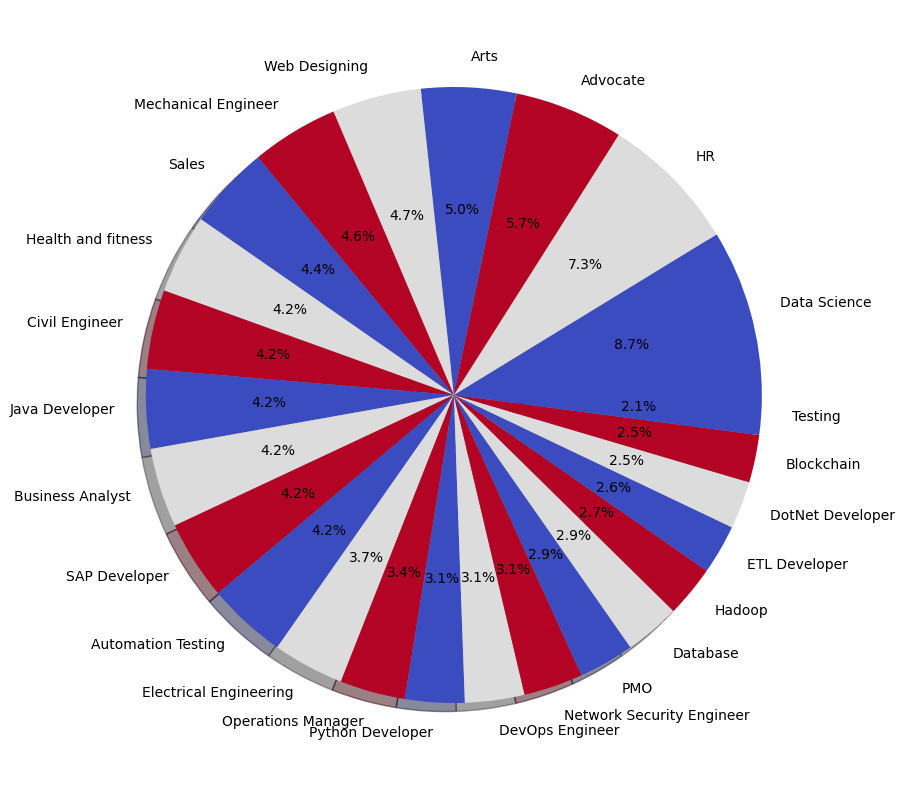

In [ ]:
value = resume['Category'].value_counts()
labels = resume['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(value,labels = labels,autopct='%1.1f%%',shadow = True,colors = plt.cm.coolwarm(np.linspace(0,1,3)))
plt.show()

In [ ]:
resume['Category'][0]

'Data Science'

In [ ]:
resume['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [ ]:
resume['Resume'].value_counts()

Resume
Technical Skills Web Technologies: Angular JS, HTML5, CSS3, SASS, Bootstrap, Jquery, Javascript. Software: Brackets, Visual Studio, Photoshop, Visual Studio Code Education Details \r\nJanuary 2015 B.E CSE Nagpur, Maharashtra G.H.Raisoni College of Engineering\r\nOctober 2009  Photography Competition Click Nagpur, Maharashtra Maharashtra State Board\r\n    College Magazine OCEAN\r\nWeb Designer \r\n\r\nWeb Designer - Trust Systems and Software\r\nSkill Details \r\nPHOTOSHOP- Exprience - 28 months\r\nBOOTSTRAP- Exprience - 6 months\r\nHTML5- Exprience - 6 months\r\nJAVASCRIPT- Exprience - 6 months\r\nCSS3- Exprience - Less than 1 year months\r\nAngular 4- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Trust Systems and Software\r\ndescription - Projects worked on:\r\n1. TrustBank-CBS\r\nProject Description: TrustBank-CBS is a core banking solution by Trust Systems.\r\nRoles and Responsibility:\r\nâ Renovated complete UI to make it more modern, user-friendly, ma

In [ ]:
resume['Resume'][90]

'Skills: Natural Languages: Proficient in English, Hindi and Marathi. Computer skills: Proficient with MS-Office, Internet operation.Education Details \r\nJanuary 2015 to January 2018 LLB Law Mumbai, Maharashtra Mumbai university\r\nJanuary 2015 B.M.M  Mumbai, Maharashtra S.K.Somaiya College, Mumbai University\r\n H.S.C   Asmita Girls junior College, Maharashtra Board\r\n S.S.C Vidya Bhawan  Maharashtra Board\r\nAdvocate \r\n\r\nLlb student and Journalist\r\nSkill Details \r\nCompany Details \r\ncompany - Criminal lawyer (law firm)\r\ndescription - '

**Cleaning Data**

In [ ]:
import re
def remove_irrelvent_data(txt):
  txt_clean = re.sub('http\S+\s',' ',txt)
  txt_clean = re.sub('@\S+',' ',txt_clean)
  txt_clean = re.sub('#\S+',' ',txt_clean)
  txt_clean = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', txt_clean)
  txt_clean = re.sub('\s+', ' ', txt_clean)
  txt_clean = re.sub(r'[^\x00-\x7f]',r' ',txt_clean)
  txt_clean = re.sub('RT | cc',' ',txt_clean)
  return txt_clean

In [ ]:
remove_irrelvent_data('my #### website like is this https://www.google.com and access it @gmail.com')

'my website like is this and access it '

In [ ]:
resume['Resume'] = resume['Resume'].apply(lambda x: remove_irrelvent_data(x))

In [ ]:
resume['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na  ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating th

In [ ]:
resume

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Table...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,Testing,Computer Skills Proficient in MS office Wo...
958,Testing,Willingness to accept the challenges P...
959,Testing,PERSONAL SKILLS Quick learner Eagernes...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [ ]:
le.fit(resume['Category'])

LabelEncoder()

In [ ]:
resume['Category'] = le.transform(resume['Category'])

In [ ]:
resume

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Table...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Wo...
958,23,Willingness to accept the challenges P...
959,23,PERSONAL SKILLS Quick learner Eagernes...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [ ]:
resume.Category

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

In [ ]:
resume.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
resume['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na  ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating th

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(stop_words='english')
vector.fit(resume['Resume'])
required = vector.transform(resume['Resume'])

In [ ]:
resume

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Table...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Wo...
958,23,Willingness to accept the challenges P...
959,23,PERSONAL SKILLS Quick learner Eagernes...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [ ]:
print(required)

  (0, 7334)	0.07793683691598892
  (0, 7322)	0.013777197763511152
  (0, 7269)	0.015627656732497608
  (0, 7265)	0.08210033175748493
  (0, 7264)	0.04530355352706441
  (0, 7263)	0.07365192031891578
  (0, 7121)	0.09060710705412882
  (0, 7108)	0.03210060782250888
  (0, 7039)	0.035643114822349116
  (0, 7035)	0.07919611392327797
  (0, 7022)	0.01507429592816611
  (0, 6998)	0.04530355352706441
  (0, 6972)	0.014498500407728567
  (0, 6968)	0.0552933422435761
  (0, 6966)	0.018466499373667587
  (0, 6961)	0.02570734972696293
  (0, 6936)	0.04105016587874247
  (0, 6911)	0.02108815173855525
  (0, 6910)	0.02280552444622189
  (0, 6828)	0.04530355352706441
  (0, 6807)	0.04530355352706441
  (0, 6723)	0.18223987213348936
  (0, 6722)	0.06348530189807601
  (0, 6721)	0.09070978155105364
  (0, 6682)	0.034048142194656
  :	:
  (961, 1634)	0.04841247730200318
  (961, 1443)	0.014269531778824876
  (961, 1396)	0.05448244426640684
  (961, 1332)	0.07186693509860675
  (961, 1238)	0.06885806758426272
  (961, 1155)	0.08296

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(required,resume['Category'],test_size=0.2,random_state = 42)

In [ ]:
x_train.shape

(769, 7348)

In [ ]:
x_test.shape

(193, 7348)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
knn = OneVsRestClassifier(KNeighborsClassifier())
knn.fit(x_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [ ]:
print("Accuracy of the testing data is: ",accuracy_score(y_test,y_pred)*100)

Accuracy of the testing data is:  98.44559585492227


**Prediction**

In [ ]:
import pickle
pickle.dump(knn,open('model.pkl','wb'))
pickle.dump(vector,open('vector.pkl','wb'))

In [ ]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [ ]:
import pickle
vector = pickle.load(open('vector.pkl','rb'))
clean_resume = remove_irrelvent_data(myresume)
input_features = vector.transform([clean_resume])
pred = knn.predict(input_features)[0]
print(pred)
category_map = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}
category = category_map.get(pred,'unknown')
print("Predicted Category is: ",category)



6
Predicted Category is:  Data Science
